## **PREDICTION OF SEQUENCE OF DAYS USING ONLY ONE VARIABLE**

In this algorithm data are collected from Binance Exchange and the prediction is about one sequence of days. The algorithm can be used for any active. In this case the active choosen has been Bitcoin. The feature is price close.

In [121]:
# LSTM  to predict Bitcoin Price
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
 
 # The first thing we want to do is import the Pandas library and set the filepath to our data file
import pandas as pd
filepath = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
 
import ssl  # we need to import this library and tweak one setting due to fact we use HTTPS certificate(s)
ssl._create_default_https_context = ssl._create_unverified_context
 
# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
df = pd.read_csv(filepath, skiprows=1)  # we use skiprows parameter because first row contains our web address
 
 # Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
df = df.sort_values(['date'], ascending=[True])
print(df.head(15))  # print first 15 lines of dataframe

def prediction_simple(df,column_to_predict,epochs=30,look_back=20,look_forward=3,test_size=0.02, batch_size=1, num_back_X_plot=4):

  #### DATA PREPARATION ####

  # Selecction of variables X and Y
  df=df
  dataset = df.iloc[:,column_to_predict].values
  plt.plot(dataset)
  plt.xlabel("day")
  plt.ylabel("Price")
  plt.title("Historical Bitcoin Price (Binance Exchange)")
  plt.show()
  # Reshape data 
  dataset = dataset.reshape(-1,1)
  dataset = dataset.astype("float32")
  dataset.shape
  # scaling 
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # trating data functions
  def create_dataset(dataset, look_back, look_forward):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_forward):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i + look_back):(i + look_back + look_forward), 0])
    return np.array(dataX), np.array(dataY)
 
  def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

  look_back = look_back
  look_forward = look_forward
  X, y = create_dataset(dataset, look_back,look_forward)
  print("X:{},y:{}".format(X.shape, y.shape))
  X_train, y_train, X_test, y_test = split_data(X, y, 0.02)
  print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
  # reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  # reshape y to be [samples, time steps, features]
  y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
  y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

  print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
  # model
  model = Sequential()
  model.add(LSTM(4, return_sequences = True, input_shape=(1, look_back)))
  model.add(Dense(y_train.shape[2]))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
  #predictions
  trainPredict = model.predict(X_train)
  testPredict = model.predict(X_test)
  #Convert to list to scaler again
  trainPredict_ = [trainPredict[i][0] for i in range(0,len(trainPredict))]
  y_train_ = [y_train[i][0] for i in range(0,len(y_train))]
  X_train_ = [X_train[i][0] for i in range(0,len(X_train))]
  testPredict_ = [testPredict[i][0] for i in range(0,len(testPredict))]
  y_test_ = [y_test[i][0] for i in range(0,len(y_test))]
  X_test_ = [X_test[i][0] for i in range(0,len(X_test))]
  #scaler
  trainPredict_ = scaler.inverse_transform(trainPredict_)
  y_train = scaler.inverse_transform(y_train_)
  X_train_ = scaler.inverse_transform(X_train_)
  testPredict_ = scaler.inverse_transform(testPredict_)
  y_test_ = scaler.inverse_transform(y_test_)
  X_test_ = scaler.inverse_transform(X_test_)
  # calculate mse
  trainSctrainScore = math.sqrt(mean_squared_error(y_train, trainPredict_))
  print('Train Score: %.2f RMSE' % (trainSctrainScore))
  testScore = math.sqrt(mean_squared_error(y_test_ , testPredict_))
  print('Test Score: %.2f RMSE' % (testScore))
  #visualization
  num_back_X_plot = num_back_X_plot
  return(X_train_, y_train_, X_test_, y_test_, testPredict_, look_forward)
                                           


              unix        date    symbol  ...  Volume BTC  Volume USDT  tradecount
1403  1.502928e+09  2017-08-17  BTC/USDT  ...      647.86   2812379.11         NaN
1402  1.503014e+09  2017-08-18  BTC/USDT  ...     1178.07   4994493.56         NaN
1401  1.503101e+09  2017-08-19  BTC/USDT  ...      371.15   1508239.39         NaN
1400  1.503187e+09  2017-08-20  BTC/USDT  ...      463.54   1915636.35         NaN
1399  1.503274e+09  2017-08-21  BTC/USDT  ...      685.12   2770592.06         NaN
1398  1.503360e+09  2017-08-22  BTC/USDT  ...      939.91   3648726.50         NaN
1397  1.503446e+09  2017-08-23  BTC/USDT  ...      980.50   4062506.52         NaN
1396  1.503533e+09  2017-08-24  BTC/USDT  ...      770.46   3225405.80         NaN
1395  1.503619e+09  2017-08-25  BTC/USDT  ...      563.36   2440323.79         NaN
1394  1.503706e+09  2017-08-26  BTC/USDT  ...      225.76    967753.32         NaN
1393  1.503792e+09  2017-08-27  BTC/USDT  ...      347.47   1507589.96         NaN
1392

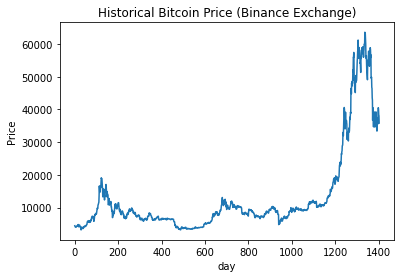

X:(1381, 20),y:(1381, 3)
X_train:(1353, 20),y_train:(1353, 3),X_test:(28, 20),y_test(28, 3)
X_train:(1353, 1, 20),y_train:(1353, 1, 3),X_test:(28, 1, 20),y_test(28, 1, 3)
Epoch 1/30
1353/1353 [==============================] - 3s 1ms/step - loss: 0.0252
Epoch 2/30
1353/1353 [==============================] - 2s 1ms/step - loss: 0.0010
Epoch 3/30
1353/1353 [==============================] - 2s 1ms/step - loss: 9.9764e-04
Epoch 4/30
1353/1353 [==============================] - 2s 1ms/step - loss: 9.4521e-04
Epoch 5/30
1353/1353 [==============================] - 2s 1ms/step - loss: 8.2796e-04
Epoch 6/30
1353/1353 [==============================] - 2s 1ms/step - loss: 9.1822e-04
Epoch 7/30
1353/1353 [==============================] - 2s 1ms/step - loss: 7.0497e-04
Epoch 8/30
1353/1353 [==============================] - 2s 1ms/step - loss: 6.8866e-04
Epoch 9/30
1353/1353 [==============================] - 2s 1ms/step - loss: 7.3615e-04
Epoch 10/30
1353/1353 [==============================]

In [122]:
column_to_predict = 3
X_train_, y_train_, X_test_, y_test_, testPredict, look_forward_ = prediction_simple(df,column_to_predict)

In [123]:
num_back_X_plot = 8
dia=8
def plot_function(num_back_X_plot,dia,X_test_,y_test_,testPredict_,look_forward =3):
  look_forward = look_forward
  num_back_X_plot=num_back_X_plot
  dia=dia
  X_test_=X_test_
  y_test_=y_test_
  testPredict_=testPredict_
  # Create X plots with pre-defined labels.
  X_data_plot = [X_test_[-num_back_X_plot + i][-dia] for i in range (0,num_back_X_plot)]
  X_Plot = np.empty(num_back_X_plot + look_forward)
  X_Plot[:] = np.nan
  X_Plot[0:num_back_X_plot] = X_data_plot
  # Create Y test
  y_test_plot = np.empty(num_back_X_plot + look_forward)
  y_test_plot[:] = np.nan
  y_test_plot[-look_forward:] = y_test_[-dia]
  y_test_plot[-look_forward-1] = X_data_plot[-1]
  # Create testPredict_
  testPredict_plot = np.empty(num_back_X_plot + look_forward)
  testPredict_plot[:] = np.nan
  testPredict_plot[-look_forward:] = testPredict_[-dia]
  testPredict_plot[-look_forward-1] = X_data_plot[-1]
  # plot baseline and predictions
  fig, ax = plt.subplots()
  ax.plot(X_Plot, 'k', label='Historic X Price', color = 'orange')
  ax.plot(y_test_plot, 'k--', label='Y Predict Price', color = 'blue')
  ax.plot(testPredict_plot, 'k--', label='Y Real predict', color = 'green')
  legend = ax.legend(loc='best', shadow=True, fontsize='medium')
  plt.title("Bitcoin Price dayly time-frame three-days Predictions")
  plt.show()


**VISUALIZATION OF PREDICTIONS**

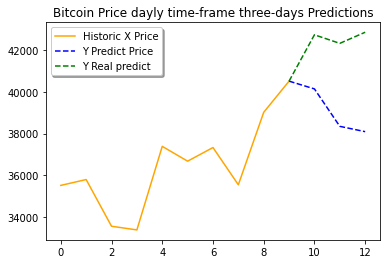

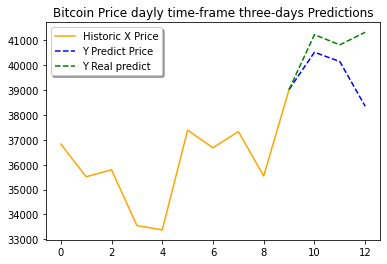

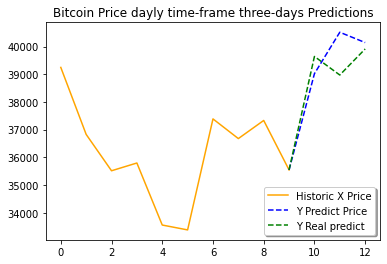

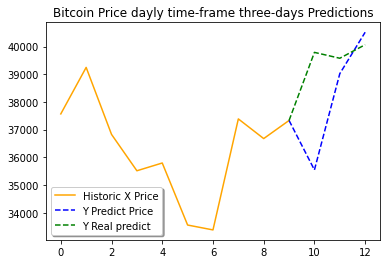

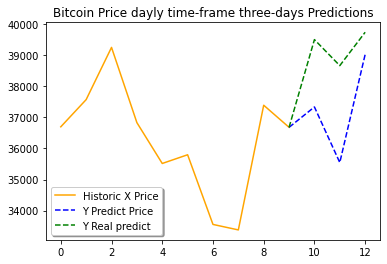

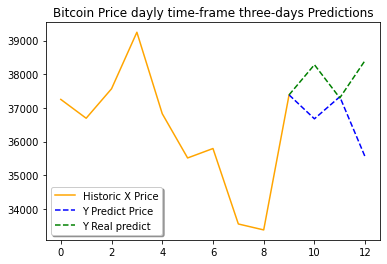

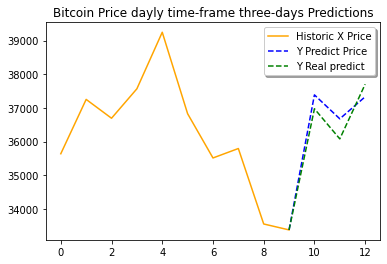

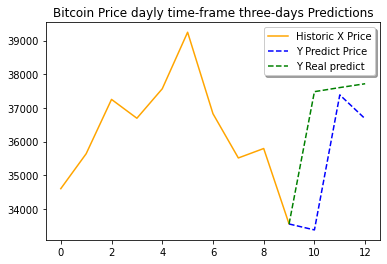

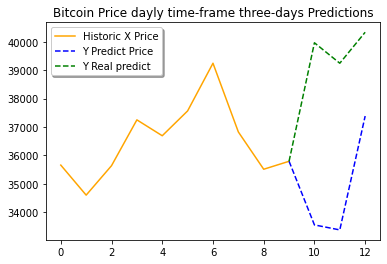

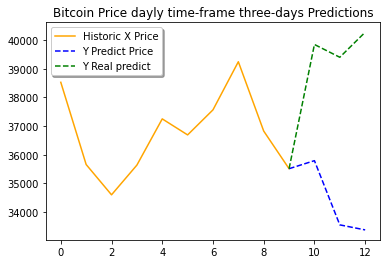

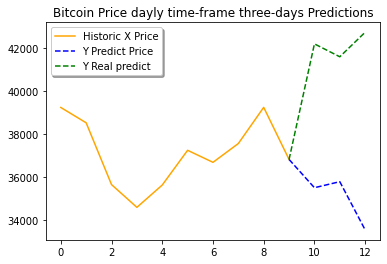

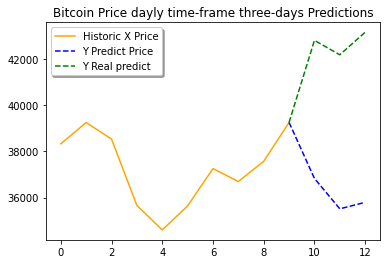

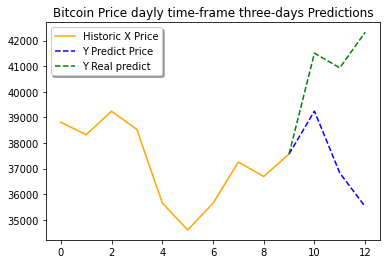

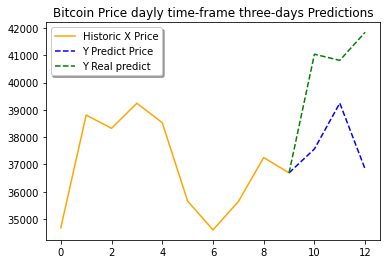

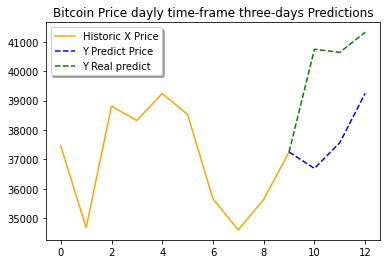

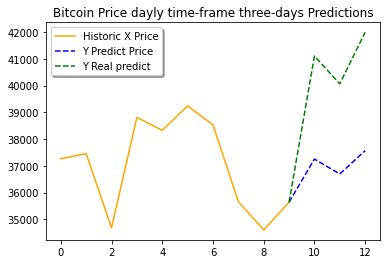

In [124]:
for i in range(1,(len(y_test_) -look_forward - dia)):
  plot_function(10,i,X_test_,y_test_,testPredict_)
  plt.show()